<a href="https://colab.research.google.com/github/Yamm23/Learning-Macine-Learning/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/LearningAI_CSV/Titanic_dataset/Titanic-Dataset.csv')

In [8]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

<Axes: xlabel='Sex', ylabel='count'>

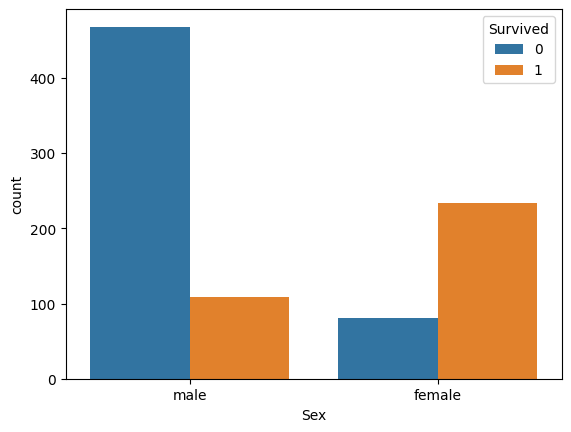

In [10]:
import seaborn as sns
sns.countplot(x='Sex',hue='Survived',data=df)

In [11]:
# Replace the null values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
# Encode categorical data
df['Sex']=df['Sex'].str.strip().str.lower().map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'C':0,'S':1,'Q':2})

In [13]:
df = df.drop(['Name', 'Ticket', 'PassengerId','Cabin'], axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived',axis = 1)
Y = df['Survived']
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.2)

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [19]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_val)
print('Validation Accuracy:', accuracy_score(Y_val, Y_pred))

Validation Accuracy: 0.7988826815642458


In [32]:
import numpy as np
new_data = np.array([[2,1,50.0,2,1,65.53,1]])
prediction = model.predict(new_data)
prediction

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

ValueError: x and y must be the same size

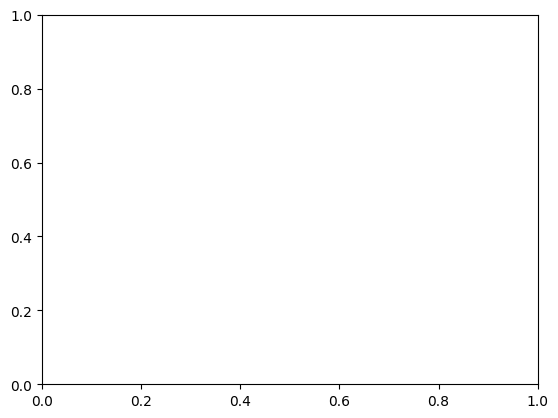

In [26]:
Y.shape

(891,)